In [1]:
# CREATE images of the given RNA molecule

# Create image input for RAG
# - sequence.txt
# - 2Dstructure.txt
# - circular RNA secondary structure plot: circular_secondary_structure.png
# - Planar RNA Secondary Structure: planar_secondary_structure
# - DSSR 3D structure plot
# Generate and save 3 views on RNA 3D structure
# rna_view_front.png
# rna_view_side.png
# rna_view_top.png
        
import os
import sys
sys.path.insert(0, "../")
sys.path.append(os.path.abspath('../'))
import shutil

# Specify path to fasta and pdb files for the given RNA molecule
path = '../data/processed/RAG/rag_pipeline/'
#path = "../results/glycine/"

# path to fasta and pdb file or RNA
fasta_file = path + "trna_glycine.fasta"
#pdb_file = "C:/Users/User/work/drfold2/output/relax/model_1.pdb"
pdb_file = os.path.splitext(fasta_file)[0] + '.pdb'

# Specify where to save output images (RAG input)
path_output = "../data/processed/RAG/RNA_images/"

# Create folder for output (RAG input)
if os.path.exists(path_output):
    shutil.rmtree(path_output)  # Delete the folder and its contents
os.makedirs(path_output) 

In [2]:
"""import os
import sys
sys.path.insert(0, "../")
sys.path.append(os.path.abspath('../'))
import shutil

# Create folder for output (RAG input)
if os.path.exists(path_output):
    shutil.rmtree(path_output)  # Delete the folder and its contents
os.makedirs(path_output) """

'import os\nimport sys\nsys.path.insert(0, "../")\nsys.path.append(os.path.abspath(\'../\'))\nimport shutil\n\n# Create folder for output (RAG input)\nif os.path.exists(path_output):\n    shutil.rmtree(path_output)  # Delete the folder and its contents\nos.makedirs(path_output) '

In [3]:
from Bio import SeqIO

# Read the first sequence
record = next(SeqIO.parse(fasta_file, "fasta"))
sequence = str(record.seq)
print(f"Sequence ID: {record.id}")
print(f"Sequence: {sequence}")

Sequence ID: URS0002910775
Sequence: GCGGGAGUAACUCAGCUGGUAGAGUGCCGGCUUCCCAAGCCGGUUGUCGCGGGUUCGAAUCCCGUCUCCCGCUCCA


Sequence: GCGGGAGUAACUCAGCUGGUAGAGUGCCGGCUUCCCAAGCCGGUUGUCGCGGGUUCGAAUCCCGUCUCCCGCUCCA
Secondary Structure: (((((((..((((........))))((((((((...))))))))....(((((.......)))))))))))).... (MFE: (-35.60))
RNA structure image saved as ../data/processed/RAG/RNA_images/circular_secondary_structure.png


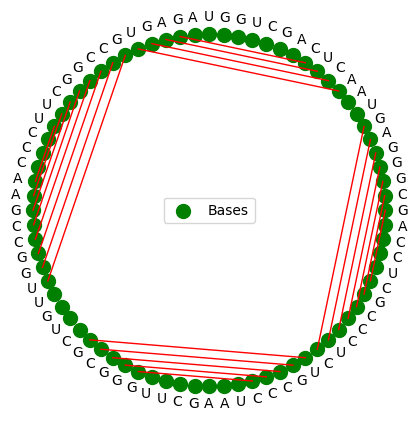

In [4]:
# Predict and plot secondary structure 
import subprocess
from lib.lib_viz import plot_circular_structure

# Predict secondary structure 
result = subprocess.run(
    ['RNAfold'], input=str(sequence), text=True, capture_output=True
)
structure, mfe = result.stdout.strip().split('\n')[1].split(' ', 1)

# # Plot RNA secondary structure I
print(f"Sequence: {sequence}")
print(f"Secondary Structure: {structure} (MFE: {mfe})")

# plot and save circular RNA secondary structure
plot_circular_structure(sequence, structure, path_output=path_output)
# save sequence
with open(path_output+"sequence.txt", "w") as f:
    f.write(sequence)
# save 2D structure as txt
with open(path_output+"2Dstructure.txt", "w") as f:
    f.write(structure)

c:\Users\User\work\rna_rag\notebooks
Running RNAplot...
RNAplot executed successfully.
RNA structure image saved as ../data/processed/RAG/RNA_images/planar_secondary_structure.png


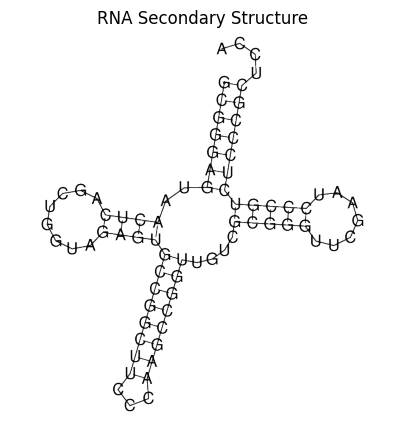

In [5]:
# plot and save Planar RNA Secondary Structure
from lib.lib_viz import plot_rna_structure

plot_rna_structure(sequence, structure, path_output=path_output)

In [6]:
from importlib import reload
import lib.lib_x3dna
reload(lib.lib_x3dna)  # Reload the module
from lib.lib_x3dna import RnaProperties

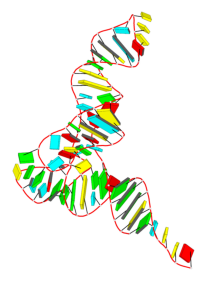

In [7]:
import matplotlib.pyplot as plt
from importlib import reload
import lib.lib_x3dna
reload(lib.lib_x3dna)  # Reload the module
from lib.lib_x3dna import RnaProperties

fromPDB = RnaProperties(sequence=sequence, pdb_input=pdb_file)
#prompt = ""
#prompt += fromPDB.get_genInfo()
#prompt += fromPDB.get_helicesInfo()
#prompt += fromPDB.get_stemsInfo()
#prompt

image3D = fromPDB.get_pdbImage()

height, width = image3D.shape[:2]

plt.figure(figsize=(width / 300, height / 300))  # 3x smaller
plt.axis('off')  # Hide axis for a cleaner view
plt.imshow(image3D)
plt.savefig(path_output+"DSSR_image.png", bbox_inches='tight', pad_inches=0)
plt.show()
#print(self.PDBprompt)

In [8]:
#### pymol images (more detailed than DSSR image))

In [9]:
# Generate and save 3 views on RNA 3D structure
# run once
import pymol
from pymol import cmd

pymol.finish_launching(["pymol", "-cq"])
cmd.reinitialize()

cmd.load(pdb_file, "rna")
cmd.hide("everything", "all")

# ── 1. DRAW THE BACKBONE & BASES, COLOUR AS BEFORE ────────────
cmd.show("cartoon", "rna")
# keep backbone color the same
cmd.set("cartoon_color", "grey70", "rna")                # uniform backbone

# show bases as molecules
cmd.show("sticks", "rna and not backbone")               # sticks on bases only
cmd.color("green",  "rna and not backbone and resn A")
cmd.color("red",    "rna and not backbone and resn U")
cmd.color("blue",   "rna and not backbone and resn C")
cmd.color("orange", "rna and not backbone and resn G")

cmd.set("ray_opaque_background", 1)
cmd.bg_color("white")

# helper: centre, orient to principal axes, zoom with small margin
def orient_and_zoom(buffer=0.0):
    # cmd.orient() aligns the longest principal axis of the model with +X.
    cmd.orient("rna")                       # x = longest, y = 2nd, z = shortest
    cmd.zoom("rna", buffer)                 # tidy crop

# ── VIEW 1: look along -Z (shows longest × 2nd‑longest) ───────
orient_and_zoom()
cmd.ray(800, 600)
cmd.png(path_output+"rna_view_front.png", width=800, height=600, dpi=300)

# ── VIEW 2: rotate 90° around Y – look along -X (shows 2nd × shortest) ─
orient_and_zoom()          # reset orientation first
cmd.ray(800, 600)
cmd.turn("y", 90)
cmd.zoom("rna", 0.0)       # re‑fit after rotation
cmd.png(path_output+"rna_view_side.png", width=800, height=600, dpi=300)

# ── VIEW 3: rotate 90° around X – look along -Y (shows longest × shortest) ─
orient_and_zoom()          # reset orientation again
cmd.ray(800, 600)
cmd.turn("x", -90)
cmd.zoom("rna", 0.0)
cmd.png(path_output+"rna_view_top.png", width=800, height=600, dpi=300)

cmd.delete("rna")
cmd.quit()

['../data/processed/RAG/RNA_images//circular_secondary_structure.png', '../data/processed/RAG/RNA_images//DSSR_image.png', '../data/processed/RAG/RNA_images//planar_secondary_structure.png', '../data/processed/RAG/RNA_images//rna_view_front.png', '../data/processed/RAG/RNA_images//rna_view_side.png', '../data/processed/RAG/RNA_images//rna_view_top.png']


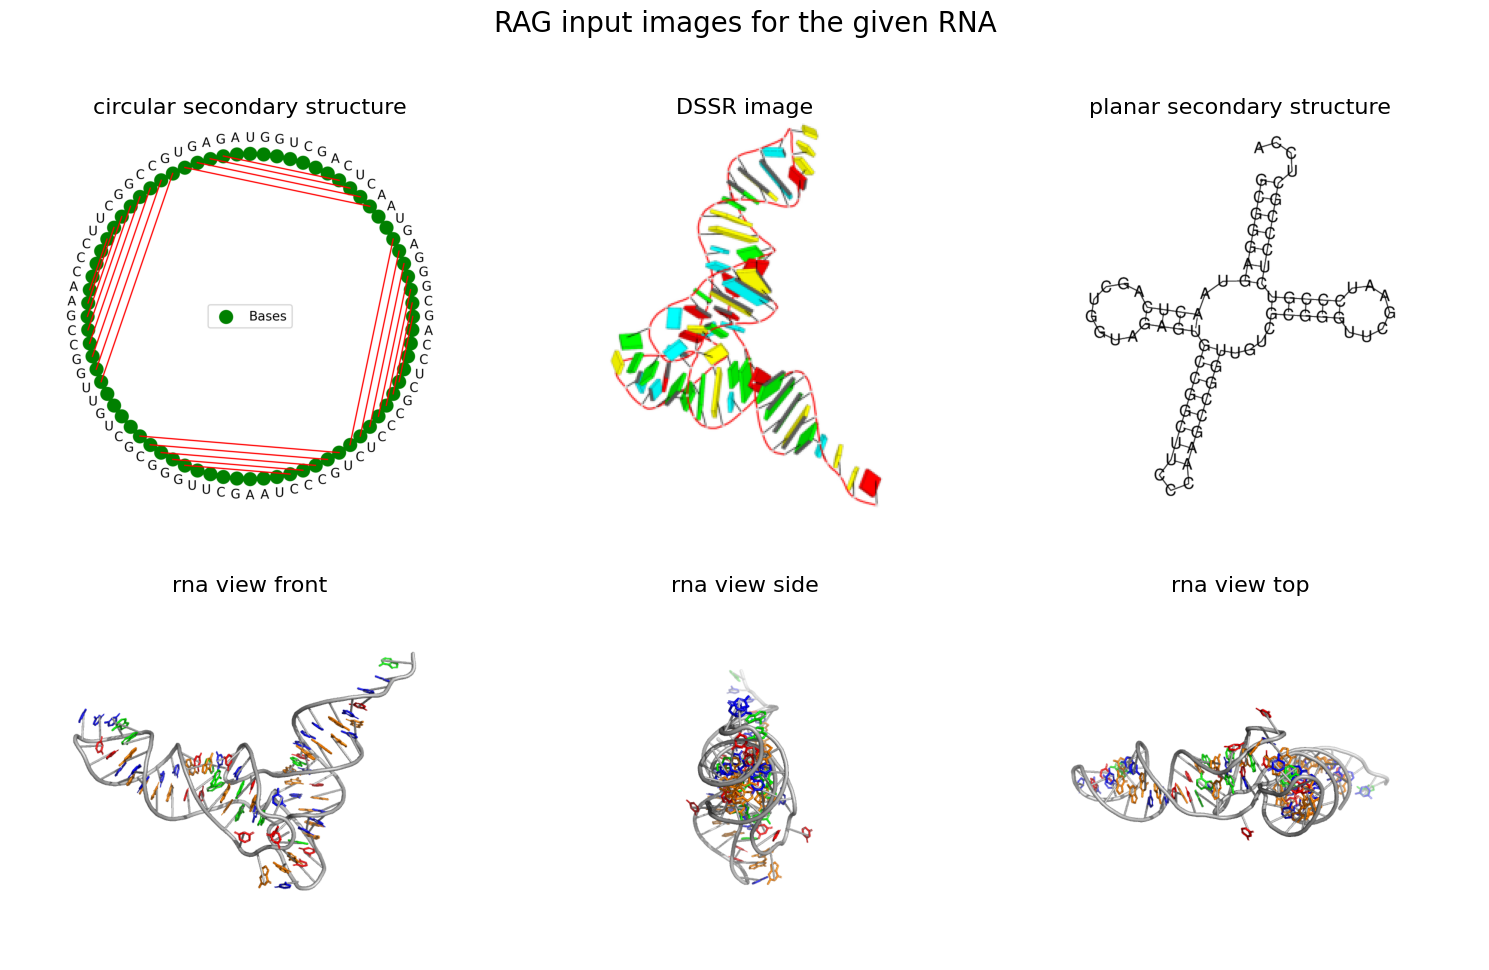

In [10]:
# Plot input for RAG

import matplotlib.pyplot as plt
from PIL import Image

#with open(patient_path+"/comment.txt", 'r', encoding='utf-8') as file:
#    comment = file.read()

image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.webp')

# List only image files
image_paths = [path_output+"/"+f for f in os.listdir(path_output)
               if f.lower().endswith(image_extensions) and 
               os.path.isfile(os.path.join(path_output, f))]
print(image_paths)
captions = [el.split(".")[-2].split("/")[-1].replace("_", " ") for el in image_paths]

# Grid parameters
n_cols = 3
n_images = len(image_paths)
n_rows = (n_images + n_cols - 1) // n_cols  # Ceiling division

# Create the plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, (img_path, caption) in enumerate(zip(image_paths, captions)):
    img = Image.open(img_path).convert('RGB') #mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(caption, fontsize=16)
    axes[i].axis('off')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add main title with controlled font size
fig.suptitle("RAG input images for the given RNA", fontsize=20)  # ⬅️ Title with controlled size

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=7.0)  # h_pad controls vertical padding  # ⬅️ Adjust to make space for title
plt.show()

In [11]:
# Compare two pdb files (optional)
pdb_file_tocompare = pdb_file

from Bio.PDB import PDBParser, Superimposer

# Helper to extract P atoms (RNA backbone)
def get_p_atoms(structure):
    atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if "P" in residue:
                    atoms.append(residue["P"])
    return atoms

# Load both PDB structures
parser = PDBParser(QUIET=True)
structure1 = parser.get_structure("rna1", pdb_file)
structure2 = parser.get_structure("rna2", pdb_file_tocompare)

# Extract P atoms
atoms1 = get_p_atoms(structure1)
atoms2 = get_p_atoms(structure2)

# Sanity check
if len(atoms1) != len(atoms2):
    raise ValueError(f"Mismatch in P atom counts: {len(atoms1)} vs {len(atoms2)}")

# Compute RMSD with optimal alignment
sup = Superimposer()
sup.set_atoms(atoms1, atoms2)
sup.apply(structure2.get_atoms())

# Output
print(f"Aligned RMSD (RNA, using P atoms): {sup.rms:.3f} Å")

Aligned RMSD (RNA, using P atoms): 0.000 Å
